<p style="background-color:#0033A0;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>🦸‍♀️ Avengers Character Detection Project with YOLOv11 🦸‍♂️</b></p>

<div style="text-align: center;">
    <img src="https://cdn.marvel.com/content/1x/theavengers_lob_mas_dsk_03_1.jpg" width="1000" height="900"/>
</div>

<h1 id="intro" style="color: #0033A0;">📥 Introduction</h1>

I completed this project to gain a better understanding of computer vision and to get a solid start with **YOLO**🚀 Working on a topic I love, such as Avengers characters, made the learning process more enjoyable and motivating. In this project, I collected a total of **552 images** to create a balanced data set for **6 different Avengers characters**:

- 🕷 **Black Widow**
- 🛡️ **Captain America**
- 💚 **Hulk**
- 🤖 **Iron Man**
- ⚡ **Thor**
- 🏹 **Hawkeye**

For each character, around 90-95 images were collected and labeled to ensure data balance. The data set was split as follows:

- 80% **Training**
- 10% **Validation**
- 10% **Test**

Additionally, I applied some image processing techniques using Roboflow to enhance the project.

**📊 Project Steps**

1. **Collecting Images:**
   - Relevant images of Avengers characters were collected.

2. **Labeling Process:**
   - The collected images were carefully labeled using [**makesense.ai**](https://www.makesense.ai/).

3. **Model Training and Prediction:**
   - The labeled images were uploaded to [**Roboflow**](https://roboflow.com/).
   - The YOLOv11 model was trained, and predictions were performed.

<h1 id="how" style="color: #0033A0;">🏋️‍♂️ How to Train YOLO11 Object Detection on a Custom Dataset</h1>

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

<h1 id="setup" style="color: #0033A0;">🛠️ Setup</h1>

<h2 id="s1" style="color: cornflowerblue;">🔑 Configure API keys</h2>

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

<h2 id="s2" style="color: cornflowerblue;">🚀 Before you start</h2>

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Feb 12 17:55:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


<h1 id="install-yolo" style="color: #0033A0;">📦 Install YOLO11 via Ultralytics</h1>

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


<h1 id="fine-tune" style="color: #0033A0;">🎯 Fine-tune YOLO11 on Dataset</h1>

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="your_api_key")
project = rf.workspace("your_workspace_name_in_roboflow").project("project_name")
version = project.version(1)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Predicting-Avengers-1 in yolov11:: 100%|██████████| 2872/2872 [00:00<00:00, 3692.73it/s]


Please note that the API key shouldn't be exposed to public. Update the code block above for the project you created in Roboflow according to your own **workspace name, project name** and **API key**.

<h1 id="training" style="color: #0033A0;">🏃‍♂️ Training</h1>

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=35 imgsz=1080 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 219MB/s]
New https://pypi.org/project/ultralytics/8.3.74 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Predicting-Avengers-1/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=1080, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fals

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	 train_batch2077.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch2.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1739383131.aa6d98645d03.1641.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	 val_batch1_pred.jpg
labels.jpg					    train_batch2075.jpg  weights
P_curve.png					    train_batch2076.jpg


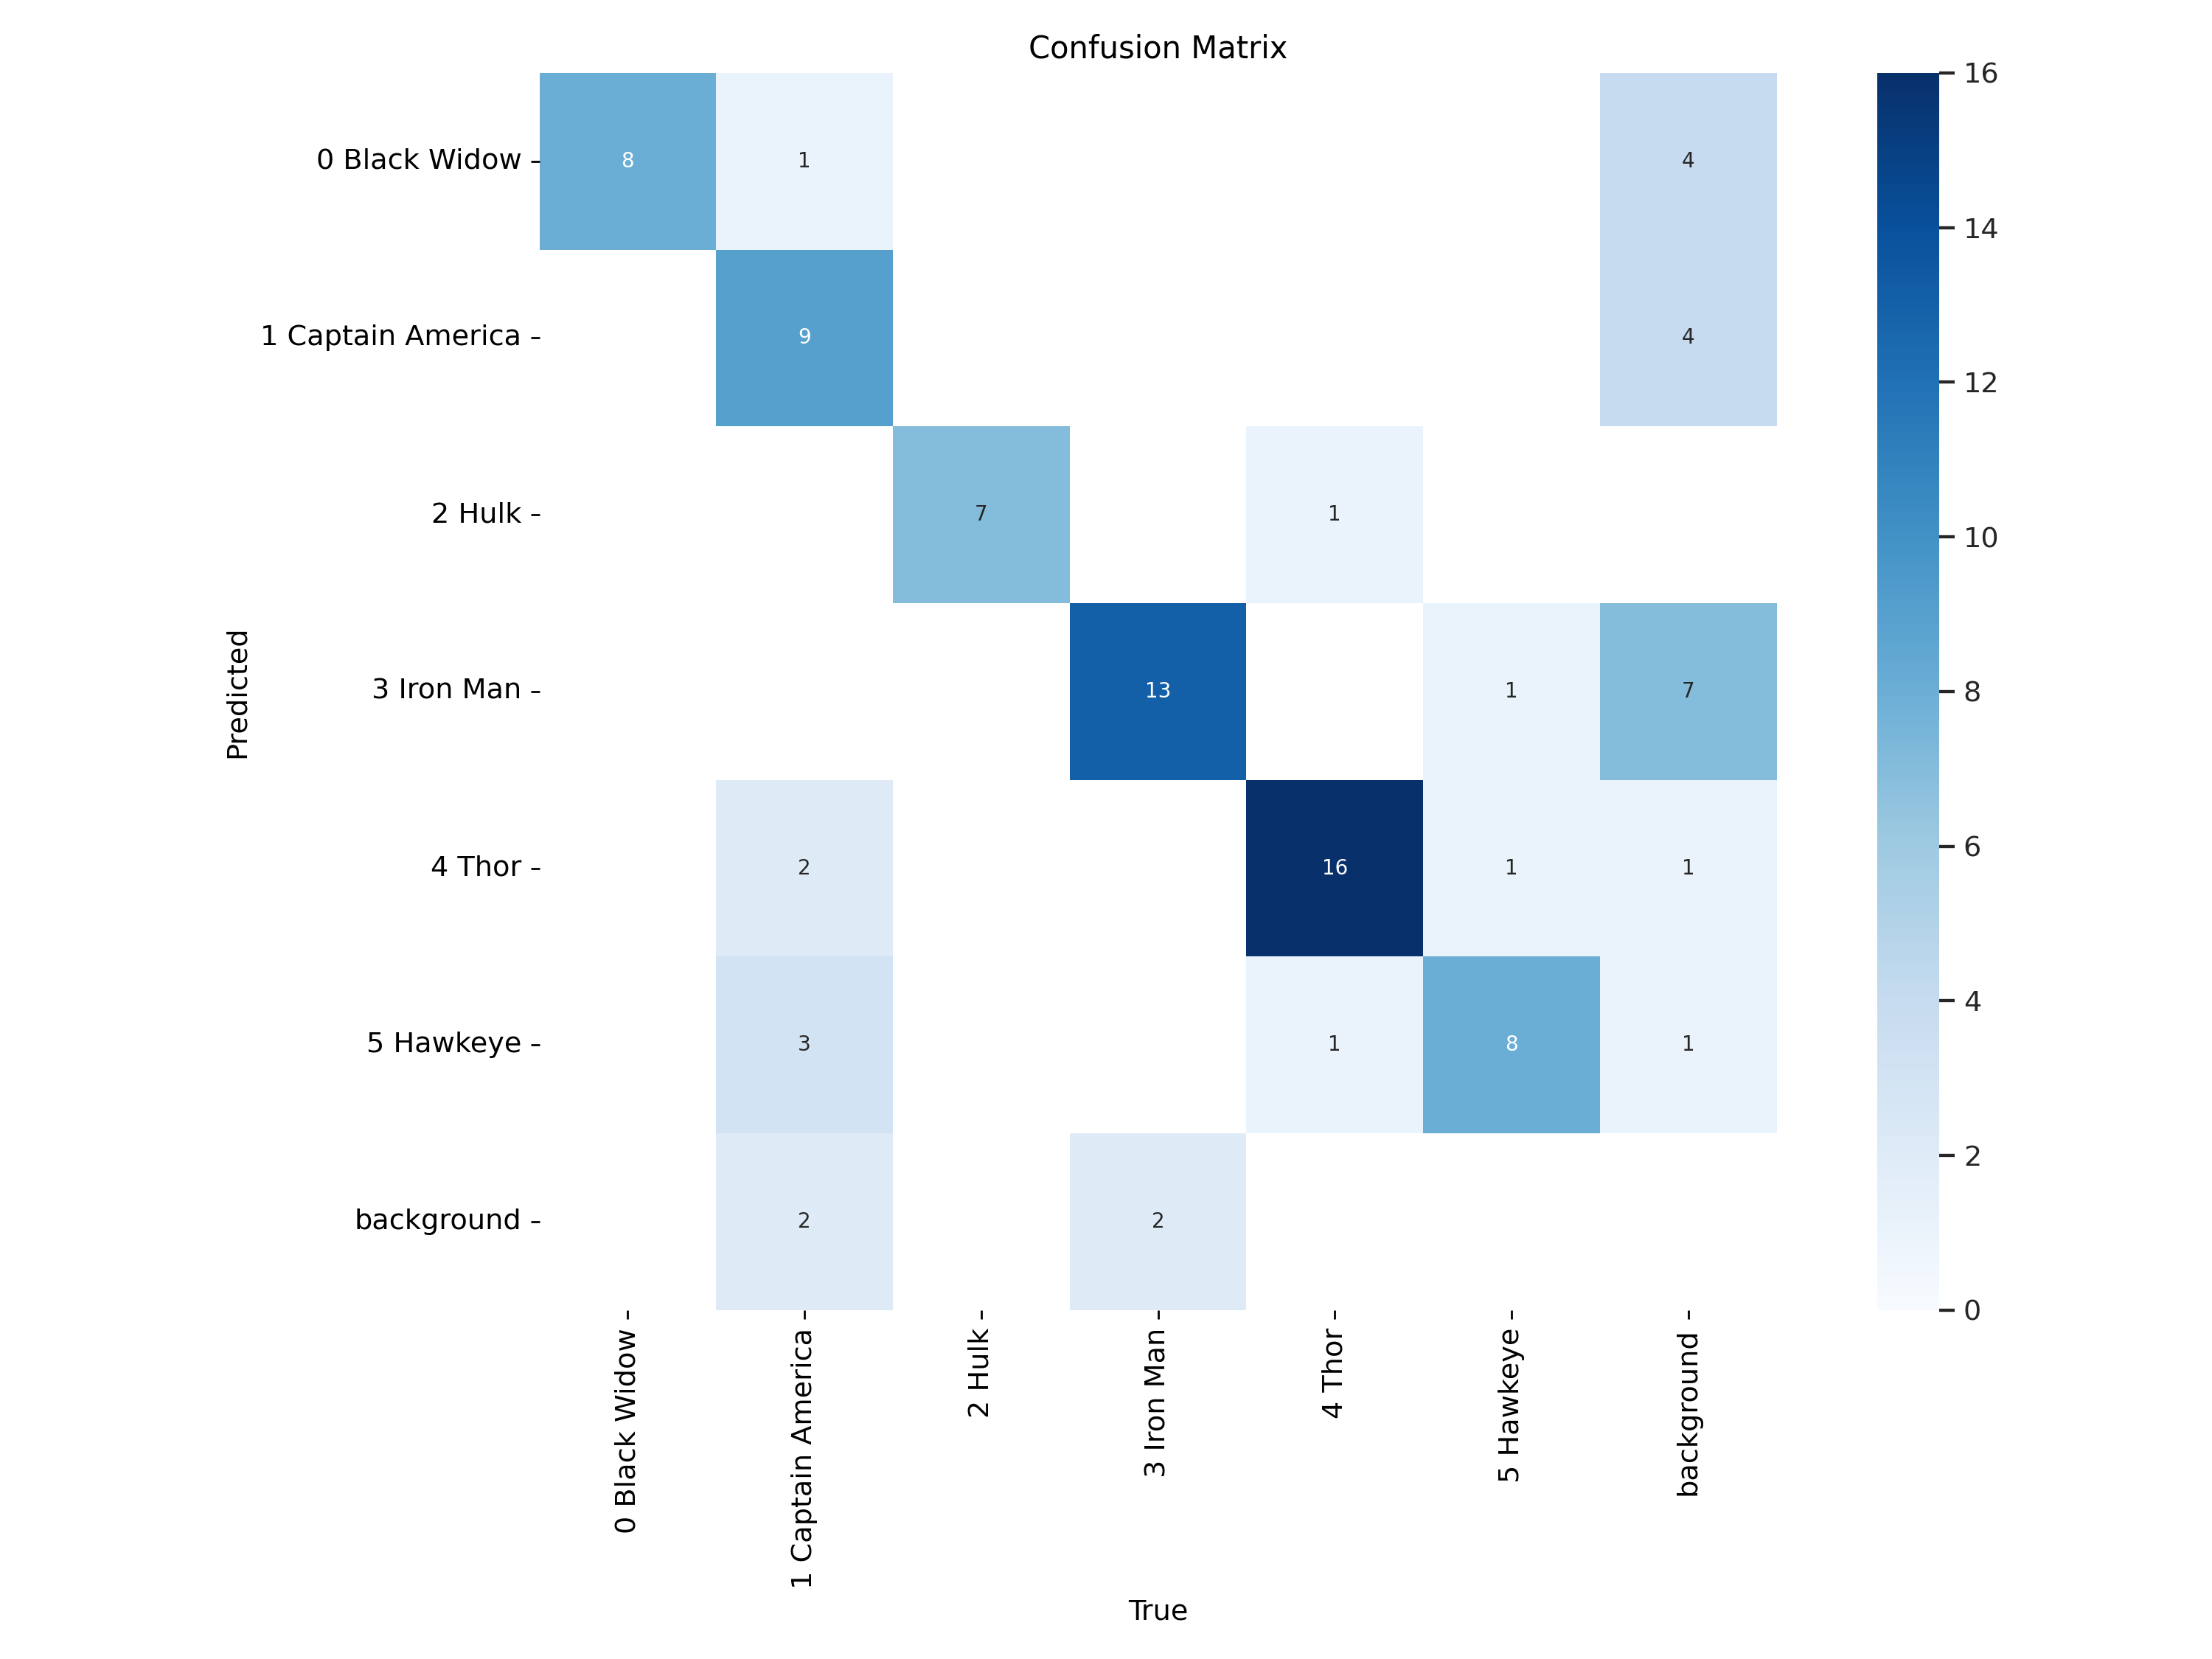

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

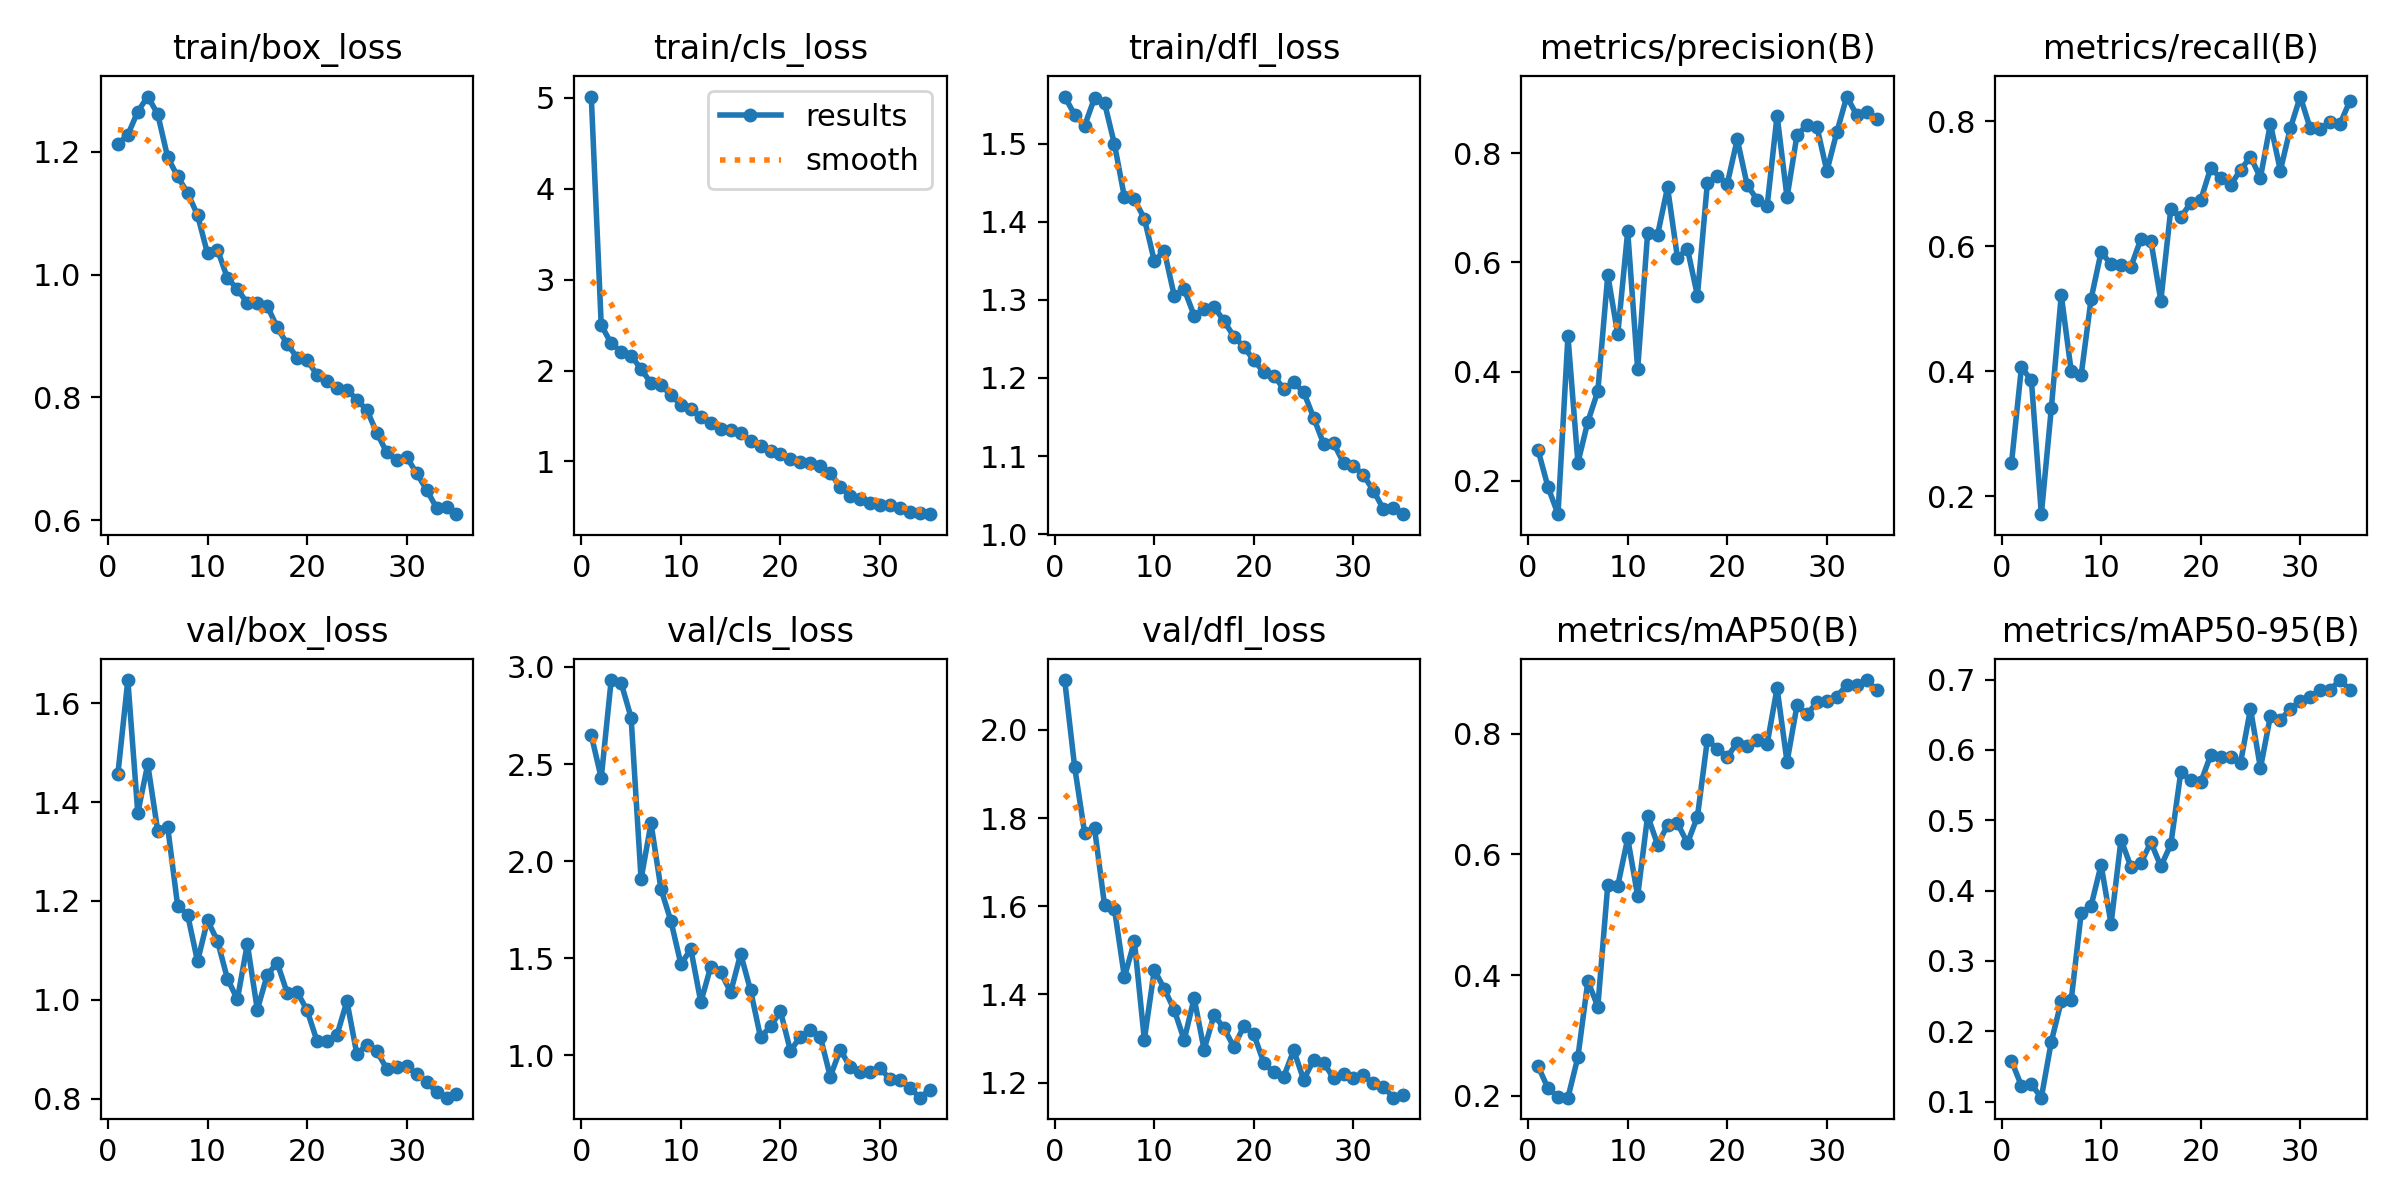

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

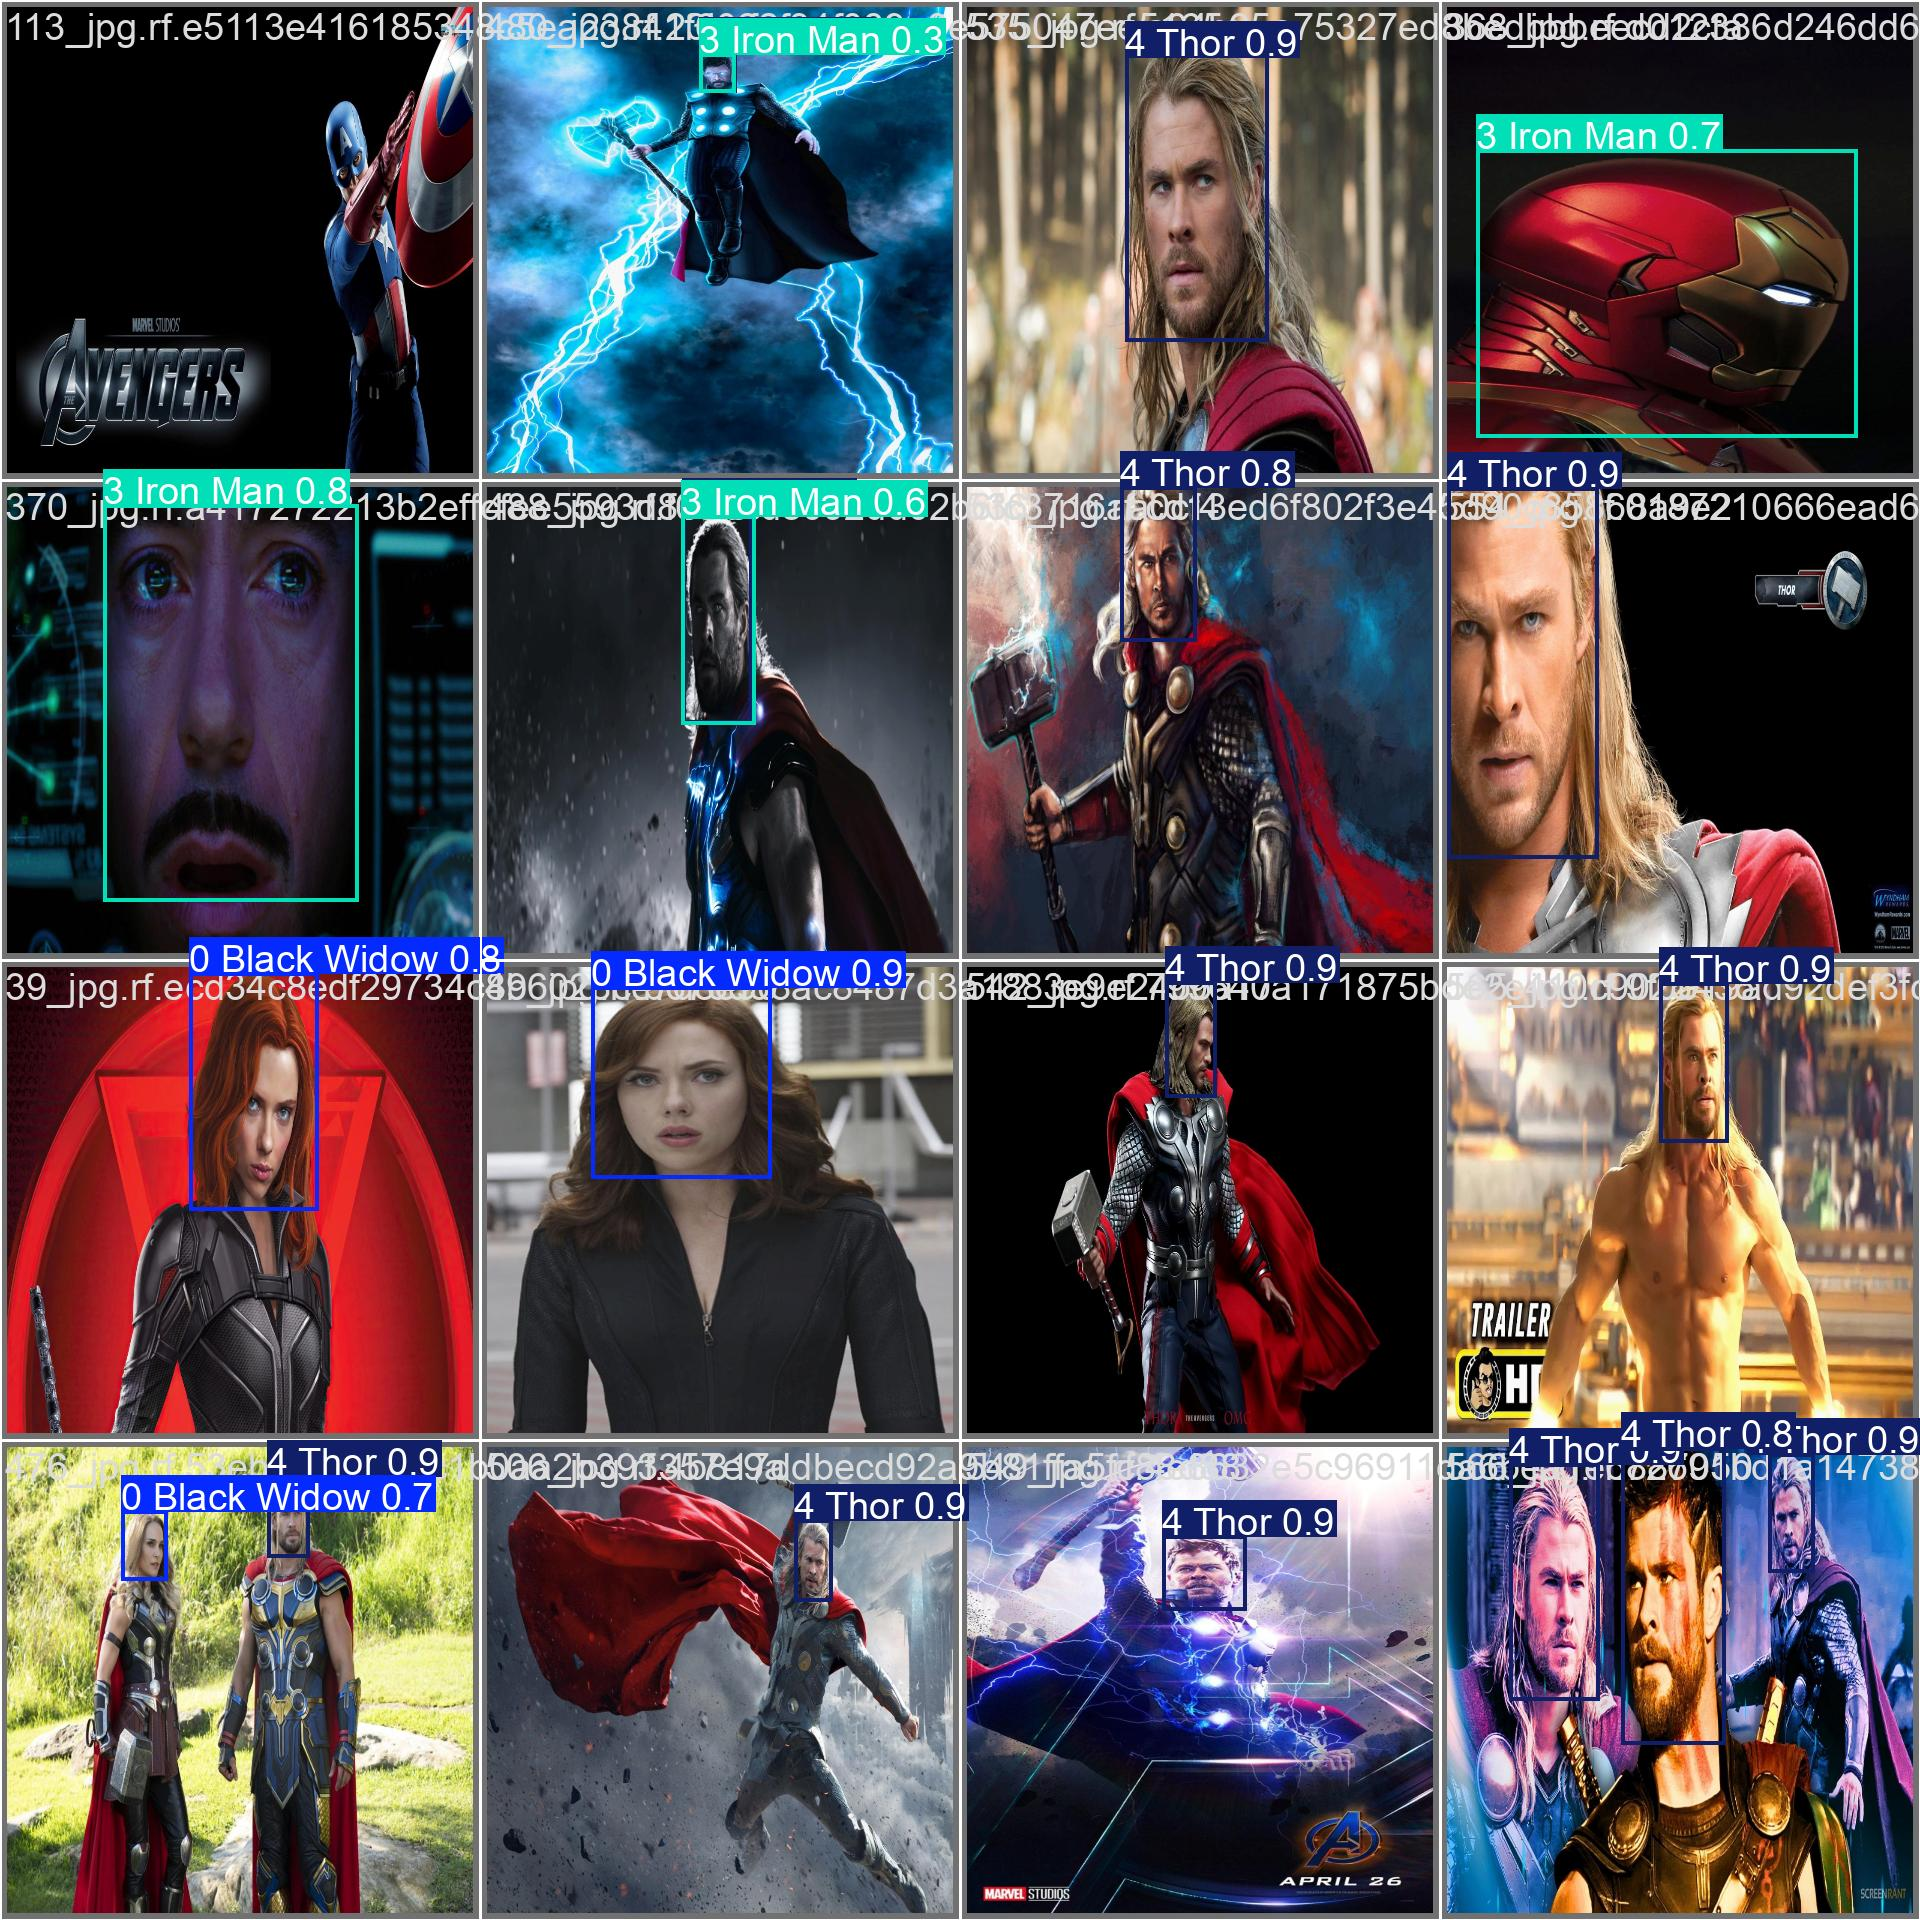

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

<h1 id="validation" style="color: #0033A0;">✔️ Validate fine-tuned model</h1>

In [12]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Predicting-Avengers-1/valid/labels.cache... 55 images, 0 backgrounds, 0 corrupt: 100% 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.06s/it]
                   all         55         75      0.876      0.796      0.889      0.699
         0 Black Widow          8          8      0.805      0.875      0.962      0.669
     1 Captain America         16         17      0.967      0.588      0.843      0.696
                2 Hulk          7          7      0.966          1      0.995      0.783
            3 Iron Man         15         15      0.847      0.733      0.879      0.701
                4 Thor         16         18      0.971      0.889      0.958      0.771
             5 Hawkeye         10  

<h1 id="prediction" style="color: #0033A0;">🔍 Prediction</h1>

In [13]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs

image 1/58 /content/datasets/Predicting-Avengers-1/test/images/102_jpg.rf.ca9cd85c5fdf5ee8392f260d541ce09e.jpg: 1088x1088 1 1 Captain America, 37.3ms
image 2/58 /content/datasets/Predicting-Avengers-1/test/images/104_jpg.rf.6a177676a4c2a8aacb2eab54ba3d62bd.jpg: 1088x1088 1 1 Captain America, 1 4 Thor, 37.3ms
image 3/58 /content/datasets/Predicting-Avengers-1/test/images/106_jpg.rf.d4ea2fac33f94154a6c9ab748f044a40.jpg: 1088x1088 1 1 Captain America, 37.3ms
image 4/58 /content/datasets/Predicting-Avengers-1/test/images/109_jpg.rf.4807d68e384b0aa77fa9b344f5affd28.jpg: 1088x1088 1 1 Captain America, 36.1ms
image 5/58 /content/datasets/Predicting-Avengers-1/test/images/122_jpg.rf.750be87b35dc1db5ab82b0d3039b2014.jpg: 1088x1088 1 1 Captain America, 30.5ms
image 6/58 /content/datasets/Predicting-Avengers-1/test/images/126_jpg.rf

**NOTE:** Let's take a look at few results.

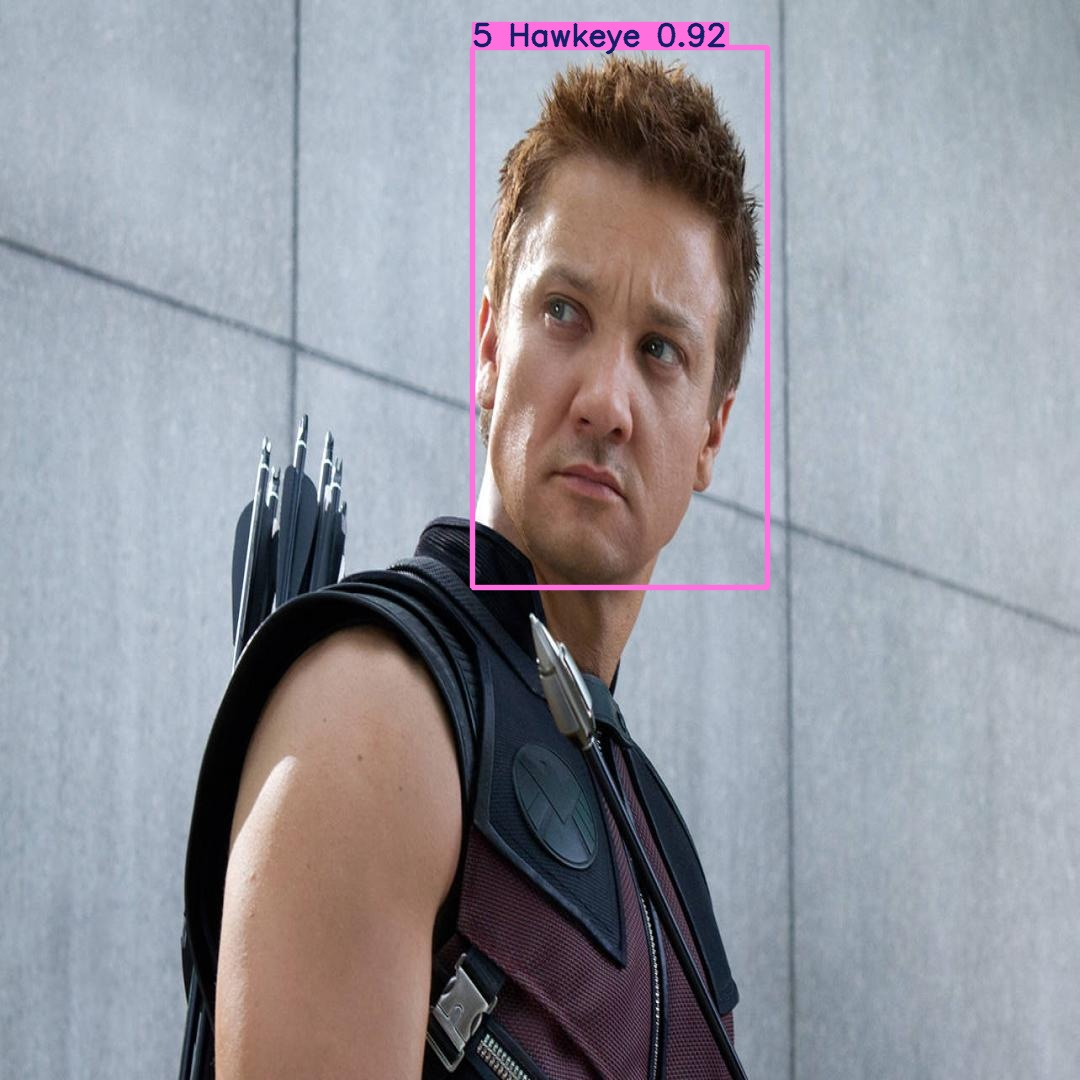

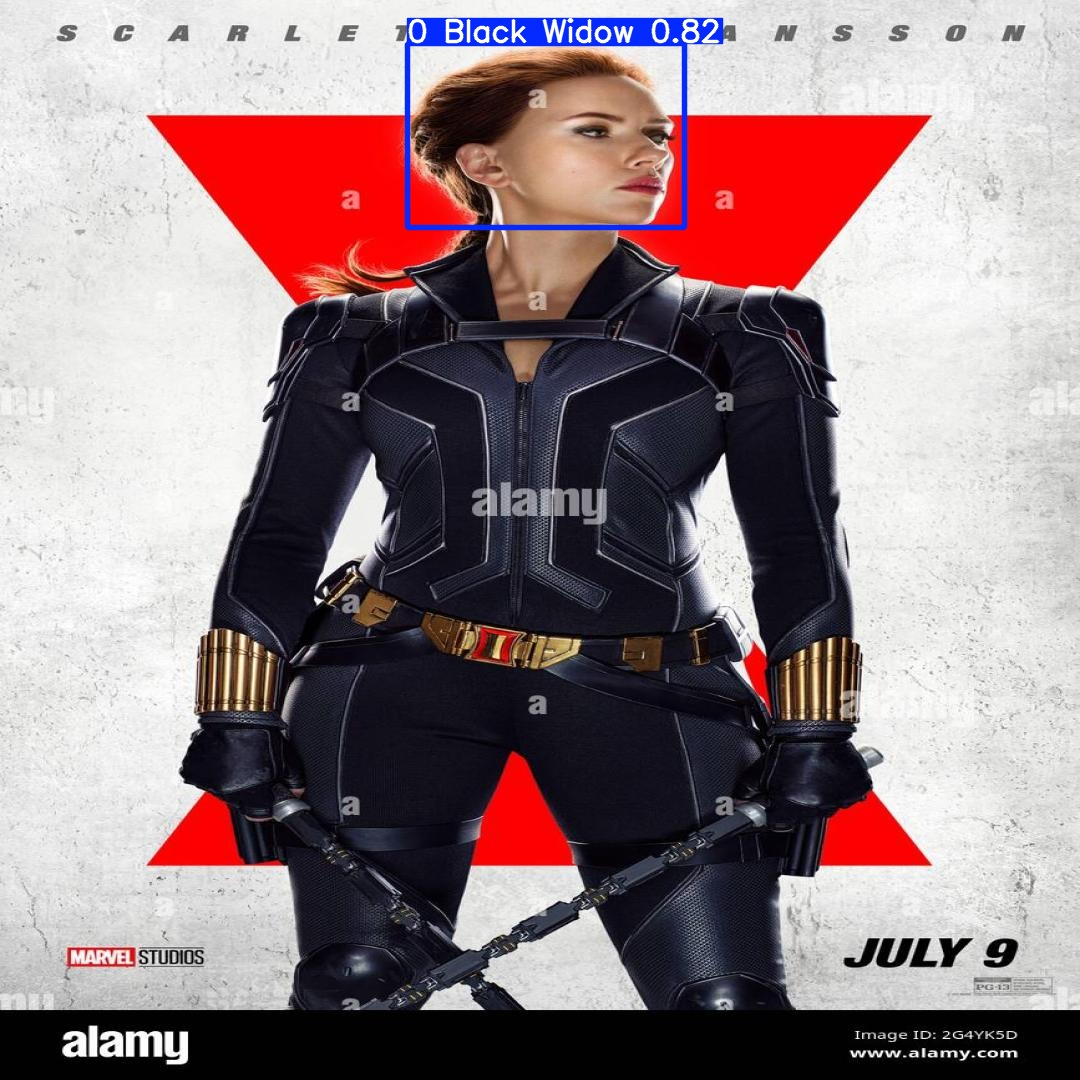

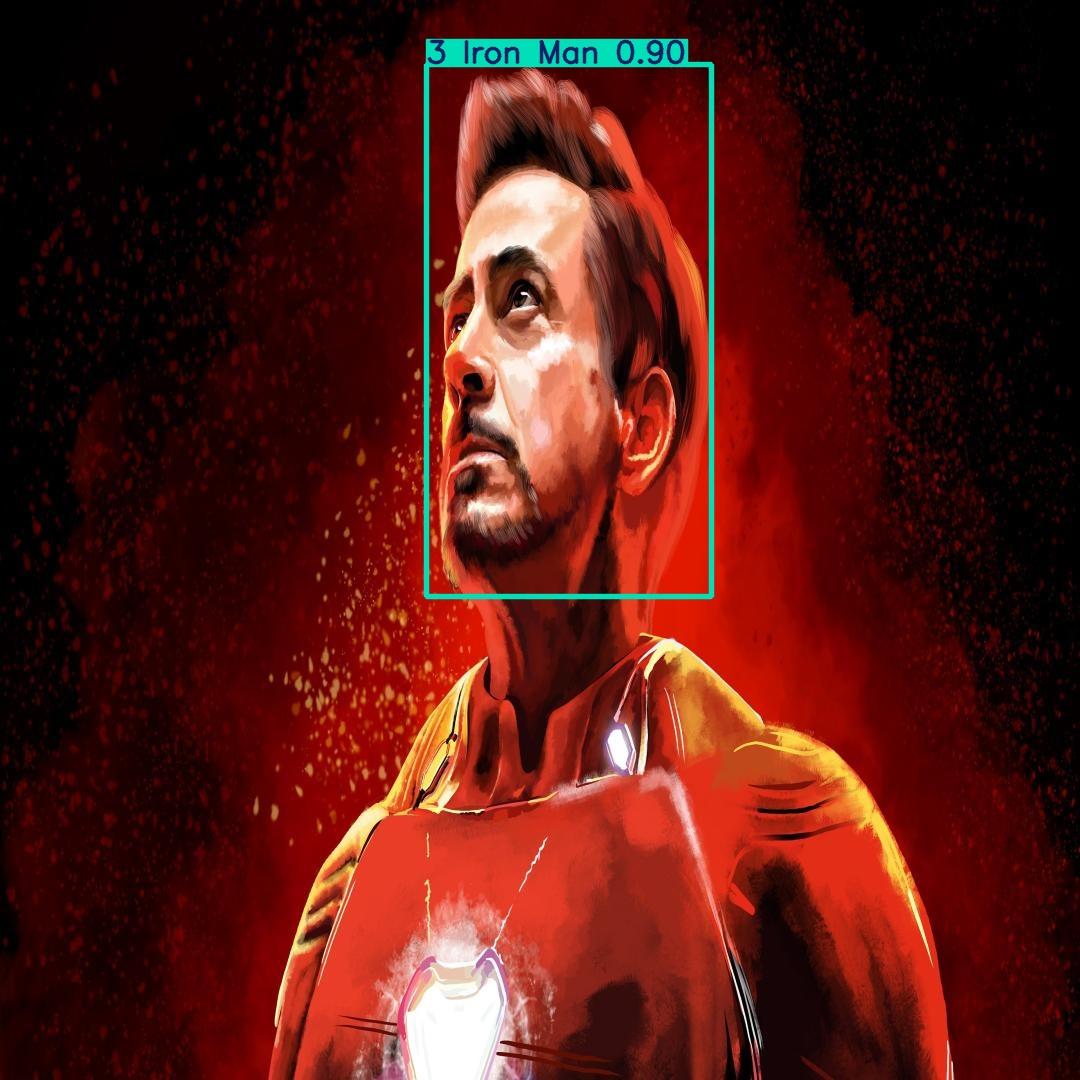

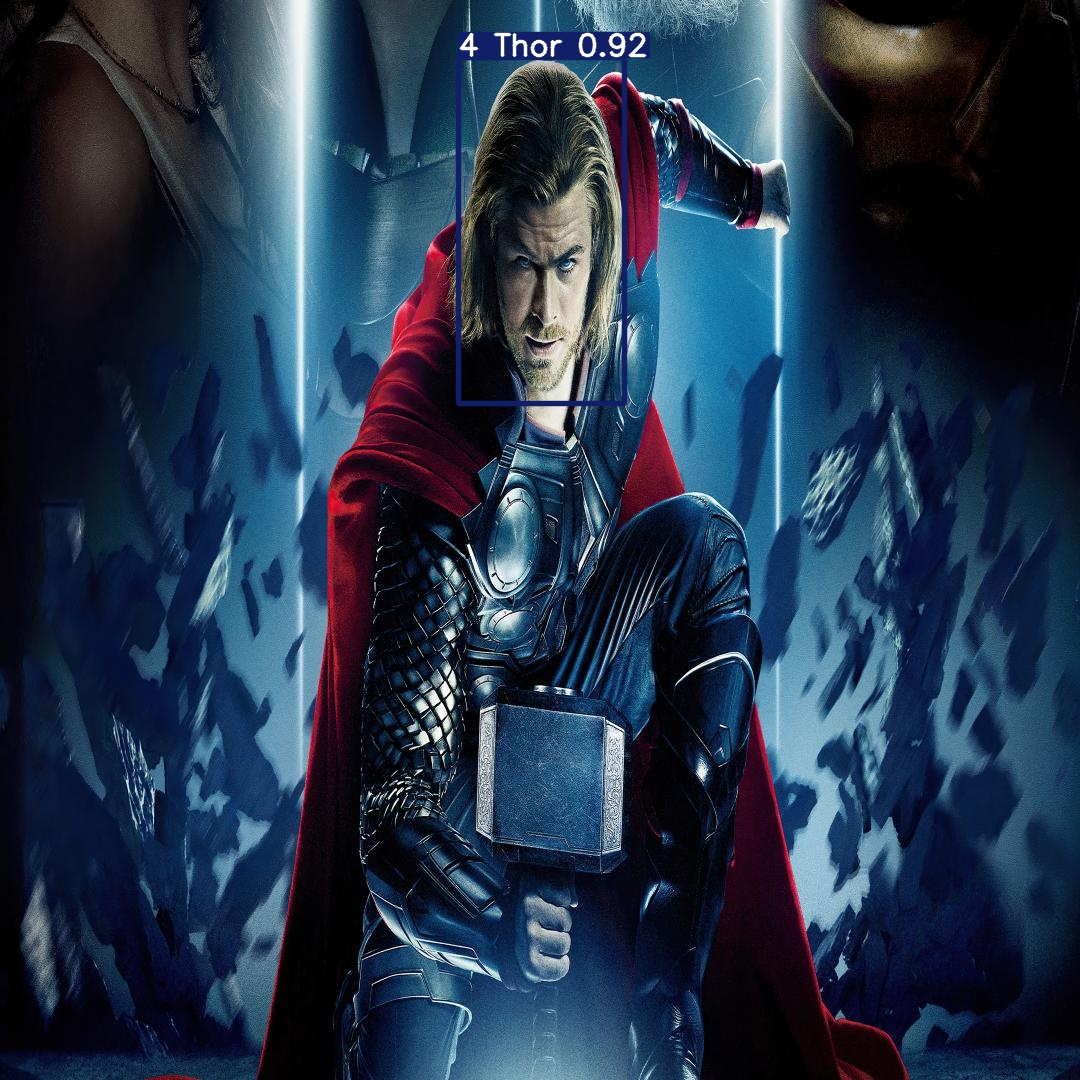

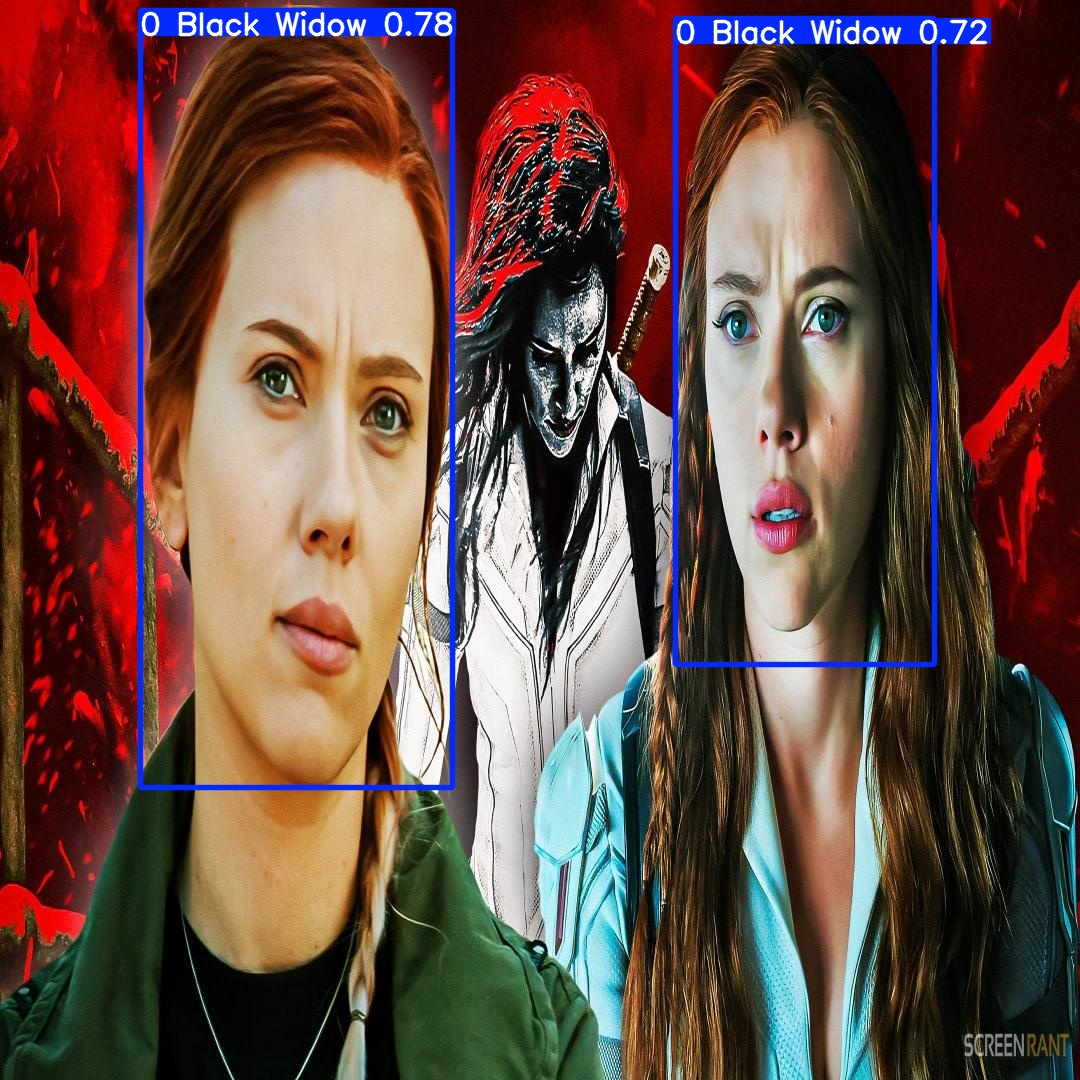

In [17]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:5]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [18]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/testphoto1.jpg save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 /content/testphoto1.jpg: 384x1088 2 0 Black Widows, 1 1 Captain America, 1 2 Hulk, 2 3 Iron Mans, 2 4 Thors, 57.4ms
Speed: 4.0ms preprocess, 57.4ms inference, 137.9ms postprocess per image at shape (1, 3, 384, 1088)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


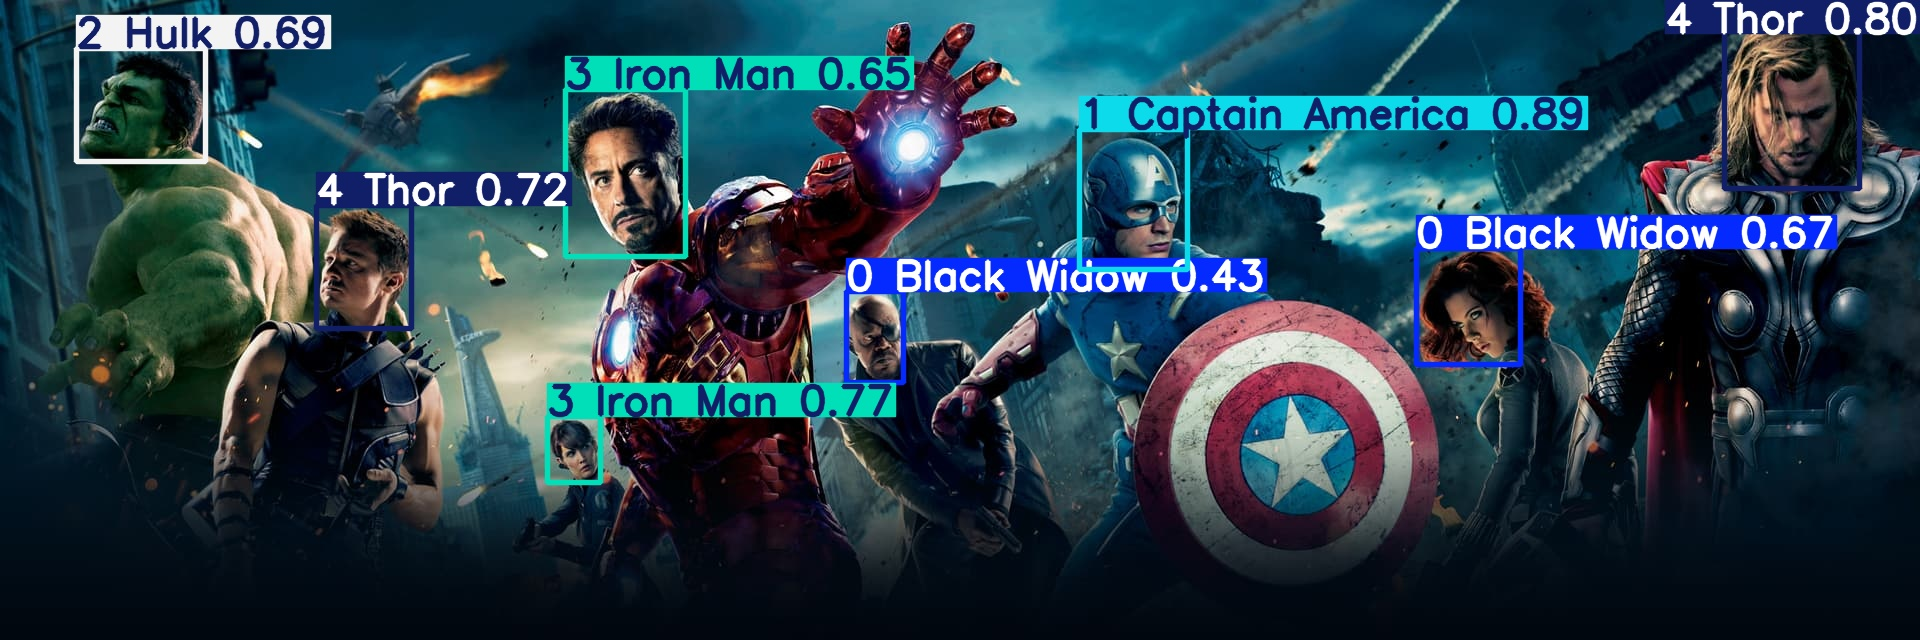

In [27]:
from IPython.display import Image as IPyImage, display

image_path = '/content/runs/detect/predict2/testphoto1.jpg'

display(IPyImage(filename=image_path, width=1000, height=500))

<h1 id="conclusion" style="color: #0033A0;">🎬 Conclusion</h1>

Through this project, I had the opportunity to dive deeper into **computer vision** concepts and explore the **YOLOv11** architecture. 💡 Working with characters I enjoy helped keep me motivated during the model training process. The experiences I gained from collecting images, labeling, and model training provided me with valuable practical knowledge in **image processing** and **object detection**. 🧠💻

<p style="background-color:#0033A0;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>✨THANK YOU!✨</b></p>